# Import the important libraries
## subtitle
### sub sub title

regular text

In [1]:
# Scientific computing
import numpy as np

# Data manipulation
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('deep') # This is the color palette I like

# The percentage is the magic to set how the plots are printed
%matplotlib inline

# Exploratory data analysis.
Let's look at the data!

In [2]:
# Importing the data with Pandas
df = pd.read_csv?

In [ ]:
df = pd.read_csv

In [3]:
# This is to read our data in a pandas data frame
# The data was originally stored in a comma separated values format aka csv.
df = pd.read_csv('../../data/flow_master.csv')

# Let's print the data to look at it
df.head()

,date,username,operator,binding_energy,rbs,repressors,IPTG_uM,mean_YFP_A,mean_YFP_bgcorr_A,fold_change_A
0,20160804,mrazomej,O2,-13.9,auto,0,0.0,3512.623320,0.000000,0.000000
1,20160804,mrazomej,O2,-13.9,delta,0,0.0,19164.225851,15651.602531,1.000000
2,20160804,mrazomej,O2,-13.9,RBS1L,870,0.0,3624.474605,111.851286,0.007146
3,20160804,mrazomej,O2,-13.9,RBS1,610,0.0,3619.786265,107.162946,0.006847
4,20160804,mrazomej,O2,-13.9,RBS1027,130,0.0,3717.019527,204.396208,0.013059


## Boolean indexing

In [4]:
# Let's find all the rows that contain O2 data
df_O2 = df[df.operator=='O2'] # Assign to df_O2 all the rows that are O2

# Print header of the new data frame df_O2
df_O2.head()

,date,username,operator,binding_energy,rbs,repressors,IPTG_uM,mean_YFP_A,mean_YFP_bgcorr_A,fold_change_A
0,20160804,mrazomej,O2,-13.9,auto,0,0.0,3512.623320,0.000000,0.000000
1,20160804,mrazomej,O2,-13.9,delta,0,0.0,19164.225851,15651.602531,1.000000
2,20160804,mrazomej,O2,-13.9,RBS1L,870,0.0,3624.474605,111.851286,0.007146
3,20160804,mrazomej,O2,-13.9,RBS1,610,0.0,3619.786265,107.162946,0.006847
4,20160804,mrazomej,O2,-13.9,RBS1027,130,0.0,3717.019527,204.396208,0.013059


#  Guided struggle. Extract the RBS1027 data

In [5]:
df_O2_1027 = df_O2[df_O2.rbs=='RBS1027']
df_O2_1027.head()

,date,username,operator,binding_energy,rbs,repressors,IPTG_uM,mean_YFP_A,mean_YFP_bgcorr_A,fold_change_A
4,20160804,mrazomej,O2,-13.9,RBS1027,130,0.0,3717.019527,204.396208,0.013059
12,20160804,mrazomej,O2,-13.9,RBS1027,130,0.1,3666.908863,148.489234,0.008699
20,20160804,mrazomej,O2,-13.9,RBS1027,130,5.0,4240.010601,800.582704,0.045769
28,20160804,mrazomej,O2,-13.9,RBS1027,130,10.0,5366.244059,1951.434974,0.111151
36,20160804,mrazomej,O2,-13.9,RBS1027,130,25.0,9264.452797,5909.675420,0.334437


# Time to plot b*tches 

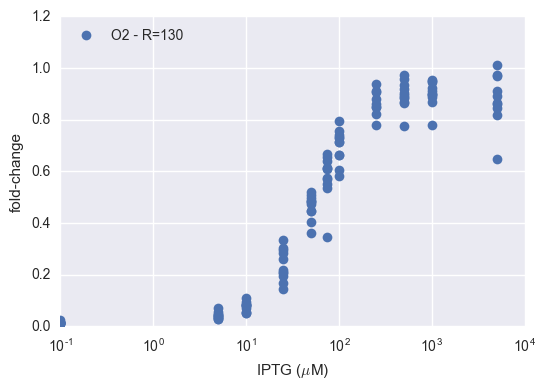

In [6]:
plt.semilogx(df_O2_1027.IPTG_uM, df_O2_1027.fold_change_A,
             'o', label='O2 - R=130')
plt.xlabel('IPTG ($\mu$M)')
plt.ylabel('fold-change')
plt.legend(loc='upper left')

# Plotting mean and standard error of the mean. 

In [7]:
# To find the unique values in a column of our data frame we use the command
# unique
IPTG = df_O2_1027.IPTG_uM.unique()

# Let's print it
IPTG

array([  0.00000000e+00,   1.00000000e-01,   5.00000000e+00,
         1.00000000e+01,   2.50000000e+01,   5.00000000e+01,
         7.50000000e+01,   1.00000000e+02,   5.00000000e+02,
         1.00000000e+03,   5.00000000e+03,   2.50000000e+02])

In [8]:
# Let's initialize arrays to save
# 1) Mean fold change
# 2) S.D. of fold change
# 3) number of data points
# For each of the concentrations
mean_fc = np.zeros_like(IPTG) # to store the mean fc
sd_fc = np.zeros_like(IPTG) # to store the sd of fc
num_fc = np.zeros_like(IPTG) # to store the number of data points

In [9]:
# Loop through each IPTG concentrations. Extract the data, compute the mean, SD
# and count the number of data points
for i, c in enumerate(IPTG):
    print(i, c)
    # First step: Extract the data
    df_tmp = df_O2_1027[df_O2_1027.IPTG_uM==c].fold_change_A
    # Second step: compute mean fc and store it
    mean_fc[i] = df_tmp.mean()
    # Third step: compute standard deviation and store it
    sd_fc[i] = df_tmp.std()
    # Fourth and last step: count the number of data points and store them
    num_fc[i] = len(df_tmp)

0 0.0
1 0.1
2 5.0
3 10.0
4 25.0
5 50.0
6 75.0
7 100.0
8 500.0
9 1000.0
10 5000.0
11 250.0


Now that we have the mean and standard deviation, let's repeat the plot with error bars!

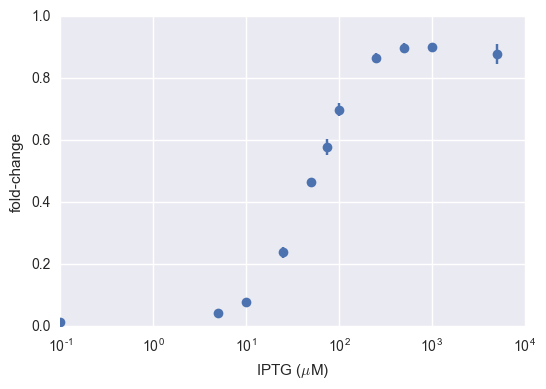

In [10]:
plt.errorbar(IPTG, mean_fc, yerr=sd_fc / np.sqrt(num_fc), 
            fmt='o')
plt.xscale('log') # That changes the x axis to log scale
plt.xlabel('IPTG ($\mu$M)')
plt.ylabel('fold-change')

#  Defining the functions for the theoretical fold-change

In [16]:
# Define the function to compute p_active as dictated by the MWC model
def pact(IPTG, ea, ei, epsilon=4.5):
    '''
    Returns the probability of a repressor being in the active state as
    described by the MWC model.
    Parameters
    ----------
    IPTG : Concentration of inducer
    ea, ei : inducer binding energies to the repressor in the active and
    inactive state respectively
    epsilon : energy difference between active and inactive state
    '''
    pact = (1 + IPTG * np.exp(-ea))**2 / \
    ((1 + IPTG * np.exp(-ea))**2 + np.exp(-epsilon) * (1 + IPTG * np.exp(-ei))**2)
    
    return pact

In [17]:
# Define the function to compute the fold-change in gene expression.
def fold_change(IPTG, ea, ei, R, epsilon_R, epsilon=4.5):
    '''
    Returns the fold-change in gene expression for a simple-repression
    architecture.
    Parameters
    ----------
    IPTG : Concentration of inducer
    ea, ei : inducer binding energies to the repressor in the active and
    inactive state respectively
    epsilon : energy difference between active and inactive state
    R : repressor copy number
    epsilon_r : binding energy of the repressor to the DNA
    '''
    fold_change = 1 / (1 + pact(IPTG, ea, ei, epsilon) *\
                       R / 4.6E6 * np.exp(-epsilon_R))
    
    return fold_change

Let's test these functions by plotting the fold-change for some parameter values.

In [18]:
# Defining the parameters for the function
R = 130 # repressors / cell
epsilon_R = -13.9 # kBT
ea = 5 # kBT
ei = -1 # kBT

# Define range of IPTG in log-scale
IPTG_array = np.logspace(-1, 4, 100) # µM

# Let's compute the fold-change using these parameters
fc_thry = fold_change(IPTG=IPTG_array, ea=ea, ei=ei, R=R, epsilon_R=epsilon_R)

Let's now plot the fold-change!!

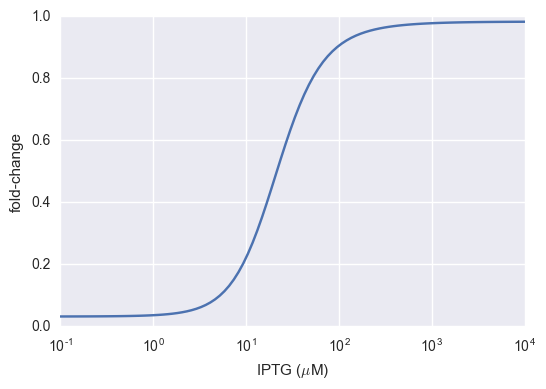

In [19]:
# Plot IPTG vs fold-change
plt.plot(IPTG_array, fc_thry)
plt.xscale('log') # That changes the x axis to log scale
plt.xlabel('IPTG ($\mu$M)')
plt.ylabel('fold-change')

# Defining the log posterior $\ln P(\varepsilon \mid D)$ 

In [ ]:
def log_post(param, indep_var, dep_var):
    '''
    
    '''